# **Prediction on** **"*Greenland: Hospital Patient Survival*"**





# **AI/ML Challenge**

A hospital in the province of Greenland has been trying to improve its care conditions by looking at the historic survival of the patients. They tried looking at their data but could not identify the main factor leading to high survival.

# **Objective**

As a Data Scientist, my goal is to build a Machine Learning model that predicts the chances of survival of a patient after 1 year of treatment.

# **Problem Statement**

The patient records collected from a hospital in Greenland, that the **"Survived_1_year"** columns are a target variable that has binary entries (0 or 1).

*  Survival_1_year == 0, implies that the patient did not survive after 1 year of treatment.
*   Survival_1_year == 1, implies that the patent survival after 1 year of treatment.
*   Evaluate the f1 score



# **Data Description:**


*   ID_Patient_Care_Situation: Care situation of a patient during treatment
*   Diagnosed_Condition: The diagnosed condition of the patient
*   ID_Patient: Patient identifier number
*   Treatment_with_drugs: Class of drugs used during treatment
*   Survived_1_year: If the patient survived after one year(0 means did not survive; 1 means survived)
*   Patient_Age: Age of the patient
*   Patient_Body_Mass_Index: A calculated value based on the patient's weight, height, etc.
*   Patient_Smoker: If the patient was a smoker or not
*   Patient_Rural_Urban: If the the the patient stayed in Rural or Urban parts of the country

*   Previous_Condition: Condition of the patient before the start of the treatment(This variable is split into 8 columns - A, B, C, D, E, E, F, Z, and Number_of_prev_cond. A, B, C, D, E, F, and Z are the previous conditions of the patient. Suppose for one patient was A. If the patient didn't have that condition, it is 0 and the same for other conditions. If a patient has previous conditions as A and C, columns A and C will have entries as 1 and 1 respectively while the other column B, D, E, F, Z will have entries 0, 0, 0, 0, 0, respectively. The column Nmber_of_prev_cond will have the entry as 2 i.e. 1 + 0 + 1 + 0 + 0 + 0 + 0 + 0 = 2 in this case.)














# **1. Importing Libraries**

In [1]:
#Load libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_CSV)
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from scipy.stats import skew,norm
%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, cross_val_score
from warnings import filterwarnings as filt

filt('ignore')
plt.rcParams['figure.figsize'] =(12,6)
plt.style.use('fivethirtyeight')

# **2. Data Preparation**

## **Source**

The patient records were collected from a hospital in Greenland, Dataset link.

pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv'

test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

## **2.1 Load the Data**

In [2]:
# Load dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

The dataset should load without incident.



# **3. Exploratory Data Analysis**

In [3]:
# Observing the first 5 rows of the dataframe
pharma_data.head().T

,0,1,2,3,4
ID_Patient_Care_Situation,22374,18164,6283,5339,33012
Diagnosed_Condition,8,5,23,51,0
Patient_ID,3333,5740,10446,12011,12513
Treated_with_drugs,DX6,DX2,DX6,DX1,NaN
Patient_Age,56,36,48,5,128
Patient_Body_Mass_Index,18.479385,22.945566,27.510027,19.130976,1.3484
Patient_Smoker,YES,YES,YES,NO,Cannot say
Patient_Rural_Urban,URBAN,RURAL,RURAL,URBAN,RURAL
Patient_mental_condition,Stable,Stable,Stable,Stable,Stable
A,1.0,1.0,1.0,1.0,0.0


In [4]:
# Information on different columns of the dataset
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

There are 23097 observations divided into 18 columns and there are missing values in the dataset.

In [5]:
pharma_data.Treated_with_drugs.value_counts()

DX6                     8606
DX5                     1909
DX2                     1904
DX1                     1835
DX3                     1830
DX4                     1792
DX3 DX4                  448
DX1 DX2                  448
DX1 DX3                  424
DX4 DX5                  423
DX2 DX4                  419
DX1 DX4                  408
DX3 DX5                  407
DX1 DX5                  402
DX2 DX5                  400
DX2 DX3                  398
DX1 DX2 DX5              103
DX1 DX3 DX5              101
DX1 DX2 DX4               99
DX3 DX4 DX5               96
DX1 DX2 DX3               95
DX2 DX3 DX5               91
DX1 DX3 DX4               90
DX2 DX3 DX4               87
DX2 DX4 DX5               84
DX1 DX4 DX5               80
DX1 DX2 DX3 DX4           24
DX1 DX3 DX4 DX5           24
DX2 DX3 DX4 DX5           22
DX1 DX2 DX4 DX5           18
DX1 DX2 DX3 DX5           14
DX1 DX2 DX3 DX4 DX5        3
Name: Treated_with_drugs, dtype: int64

Let's convert all the values in the columns - 'Treated_with_drugs' to upper case

In [6]:
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].str.upper()

In [7]:
pharma_data.Patient_Smoker.value_counts()

NO            13246
YES            9838
Cannot say       13
Name: Patient_Smoker, dtype: int64

There should be three category here -NO, YES, and Cannot say.

In [8]:
def change(x):
  if x == 'NO':
    return 'NO'
  if  x == 'YES' or x == 'YESS':
    return 'YES'
  if x == 'CANNOT SAY':
    return 'CANNOT SAY'

In [9]:
pharma_data.Patient_Smoker = pharma_data.Patient_Smoker.apply(change)

In [10]:
pharma_data.Patient_Rural_Urban.value_counts()

RURAL    16134
URBAN     6963
Name: Patient_Rural_Urban, dtype: int64

In [11]:
pharma_data.Patient_mental_condition.value_counts()

Stable    23097
Name: Patient_mental_condition, dtype: int64

## Handling the Missing Values

In [12]:
# filling the missing value of 'Number_of_prev_cond' and 'Treated_with_drugs'
pharma_data['Treated_with_drugs'] = pharma_data['Treated_with_drugs'].fillna(pharma_data['Treated_with_drugs']
                                                                               .mode()[0])
pharma_data['Number_of_prev_cond'] = pharma_data['Number_of_prev_cond'].fillna(pharma_data['Number_of_prev_cond']
                                                                               .mode()[0])
pharma_data['Patient_Smoker'] = pharma_data['Patient_Smoker'].fillna(pharma_data['Patient_Smoker']
                                                                               .mode()[0])

In [13]:
# Preprocessing for categorical data
pharma_data['A'].fillna(pharma_data['A'].mode()[0],inplace=True)
pharma_data['B'].fillna(pharma_data['B'].mode()[0],inplace=True)
pharma_data['C'].fillna(pharma_data['C'].mode()[0],inplace=True)
pharma_data['D'].fillna(pharma_data['D'].mode()[0],inplace=True)
pharma_data['E'].fillna(pharma_data['E'].mode()[0],inplace=True)
pharma_data['F'].fillna(pharma_data['F'].mode()[0],inplace=True)
pharma_data['Z'].fillna(pharma_data['Z'].mode()[0],inplace=True)

In [14]:
pharma_data.isnull().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
Survived_1_year              0
dtype: int64

#**4. Data Visualization**

In [15]:
# The numerical features
numeric_data = pharma_data[['Diagnosed_Condition','Patient_Age','Patient_Body_Mass_Index','Number_of_prev_cond','Survived_1_year']]
numeric_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,2.0,0
1,5,36,22.945566,1.0,1
2,23,48,27.510027,1.0,0
3,51,5,19.130976,1.0,1
4,0,128,1.348400,1.0,1


In [16]:
# checking the null values in numerical columns 
numeric_data.isnull().sum()

Diagnosed_Condition        0
Patient_Age                0
Patient_Body_Mass_Index    0
Number_of_prev_cond        0
Survived_1_year            0
dtype: int64

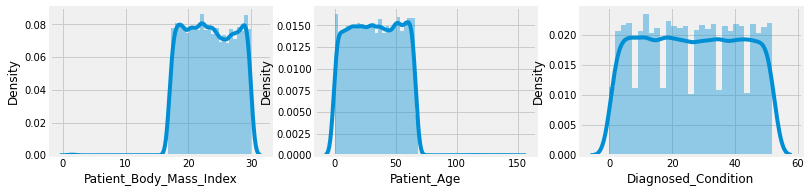

In [17]:
plt.figure(figsize=(12,6))

plt.subplot(231)
sns.distplot(numeric_data['Patient_Body_Mass_Index'])

plt.subplot(232)
sns.distplot(numeric_data['Patient_Age'])

plt.subplot(233)
sns.distplot(numeric_data['Diagnosed_Condition'])




## **4.1 Descriptive Statistics of the numerical data**

In [18]:
numeric_data.describe()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000
mean,26.413127,33.209768,23.454820,1.710352,0.632247
std,15.030865,19.549882,3.807661,0.768216,0.482204
min,0.000000,0.000000,1.089300,1.000000,0.000000
25%,13.000000,16.000000,20.205550,1.000000,0.000000
50%,26.000000,33.000000,23.386199,2.000000,1.000000
75%,39.000000,50.000000,26.788154,2.000000,1.000000
max,52.000000,149.000000,29.999579,5.000000,1.000000


## **4.2 The Box Plot and Outliers**

The five-number summary is:

1.   minimum
2.   first quartile(Q1)
1.   median
2.   third quartile(Q1)
1.   maximum


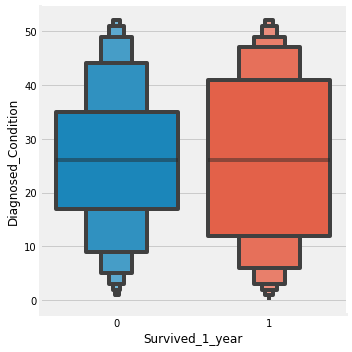

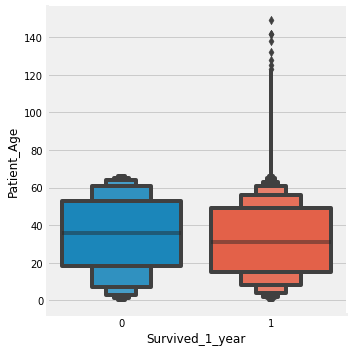

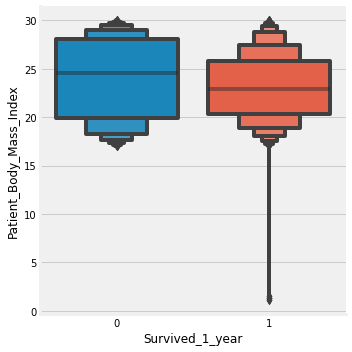

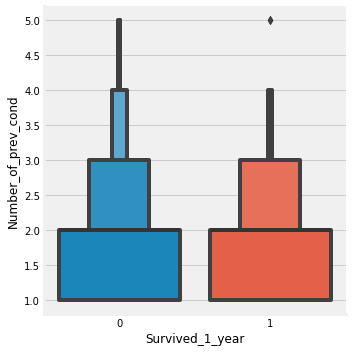

In [19]:
for feature in numeric_data.drop('Survived_1_year', axis = 1).columns:
  sns.catplot(x='Survived_1_year', y = feature, data=numeric_data,kind = 'boxen')
  plt.show()

## **4.3 Correlation and histogram Analysis**



### **4.3.a Numerical Data**

Correlation analysis of numeric data between the continuous variables, visualized by using a heatmap

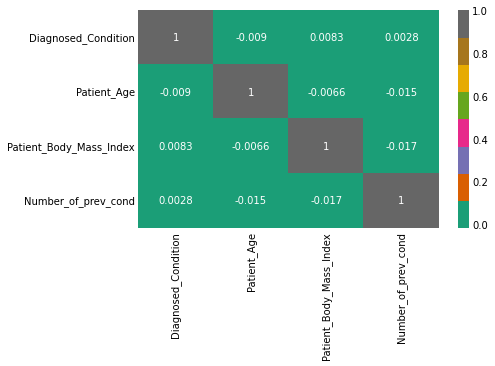

In [20]:
numeric_data = numeric_data.drop(['Survived_1_year'],axis = 1)
sns.heatmap(numeric_data.corr(),cmap = 'Dark2',annot = True)
plt.show()

### **4.3.b Categorical Data**

histogram analysis of categorical data between the continuous variables and visualization for Patient_Smoker, Patient_Rural_Urban, Patient_mental_condition which Treatment with drugs

In [21]:
categorical_data = pharma_data.drop(numeric_data.columns, axis = 1)

categorical_data.drop(['Patient_ID','ID_Patient_Care_Situation'], axis = 1, inplace = True)

categorical_data.head()

,Treated_with_drugs,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Survived_1_year
0,DX6,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
1,DX2,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,DX6,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,DX1,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,DX6,NO,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


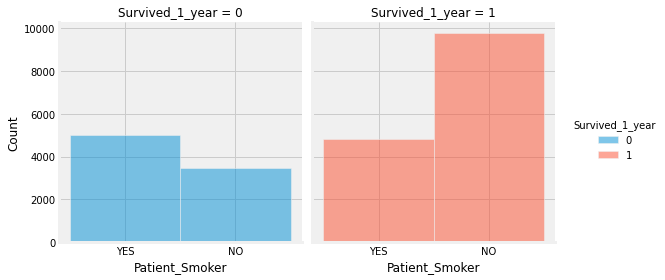

<Figure size 1080x360 with 0 Axes>

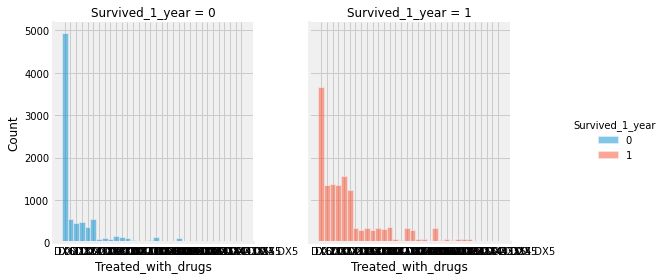

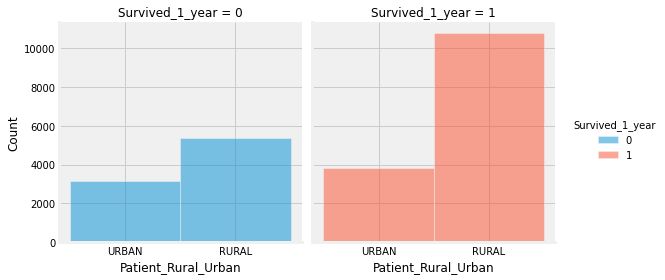

<Figure size 1080x360 with 0 Axes>

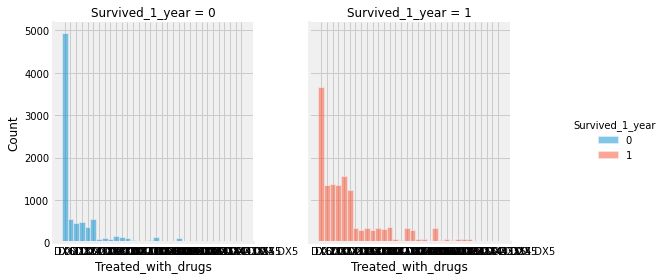

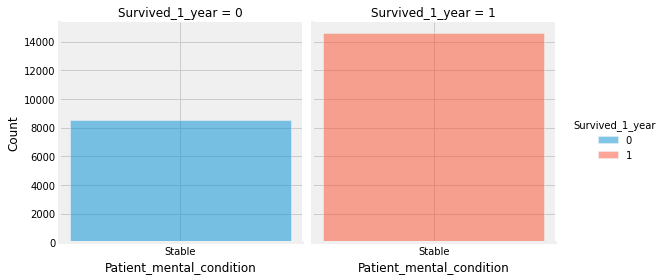

<Figure size 1080x360 with 0 Axes>

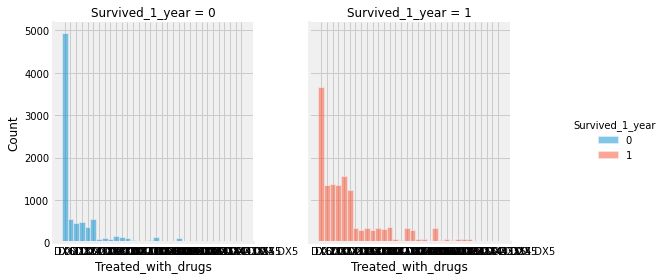

In [22]:
# Visualization of categorical columns

for feature in ['Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition']:
  sns.displot(x=feature, hue='Survived_1_year', data=categorical_data, col='Survived_1_year', height=4);

  plt.figure(figsize=(15,5))
  sns.displot(x='Treated_with_drugs',hue='Survived_1_year', data = categorical_data, col='Survived_1_year', height=4);
  

#**5. Pre-Processing and Data Cleaning of Categorical variable**

Let's split all those combined drugs into individual drugs and create dummies.

In [23]:
drugs = pharma_data['Treated_with_drugs'].str.get_dummies(sep=' ')

drugs.head()

,DX1,DX2,DX3,DX4,DX5,DX6
0,0,0,0,0,0,1
1,0,1,0,0,0,0
2,0,0,0,0,0,1
3,1,0,0,0,0,0
4,0,0,0,0,0,1


In [24]:

pharma_data = pharma_data.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'], axis=1)
pharma_data.head()


,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,Number_of_prev_cond,Survived_1_year
0,8,56,18.479385,YES,URBAN,Stable,2.0,0
1,5,36,22.945566,YES,RURAL,Stable,1.0,1
2,23,48,27.510027,YES,RURAL,Stable,1.0,0
3,51,5,19.130976,NO,URBAN,Stable,1.0,1
4,0,128,1.348400,NO,RURAL,Stable,1.0,1


The Patient smoker has a mode category 'Cannot say'

In [25]:
pharma_data.Patient_Smoker.value_counts()

NO     13259
YES     9838
Name: Patient_Smoker, dtype: int64

In [26]:
pharma_data.Patient_Smoker[pharma_data['Patient_Smoker'] == 'Cannot say'] = 'NO'

In [27]:
pharma_data.drop('Patient_mental_condition', axis = 1, inplace = True)

Let's convert the remaining categorical column to a numerical column using the get_dummies() function of pandas.

In [28]:
pharma_data = pd.get_dummies(pharma_data, columns=['Patient_Smoker','Patient_Rural_Urban'])

In [29]:
pharma_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Survived_1_year,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,2.0,0,0,1,0,1
1,5,36,22.945566,1.0,1,0,1,1,0
2,23,48,27.510027,1.0,0,0,1,1,0
3,51,5,19.130976,1.0,1,1,0,0,1
4,0,128,1.348400,1.0,1,1,0,1,0


In [30]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        23097 non-null  int64  
 1   Patient_Age                23097 non-null  int64  
 2   Patient_Body_Mass_Index    23097 non-null  float64
 3   Number_of_prev_cond        23097 non-null  float64
 4   Survived_1_year            23097 non-null  int64  
 5   Patient_Smoker_NO          23097 non-null  uint8  
 6   Patient_Smoker_YES         23097 non-null  uint8  
 7   Patient_Rural_Urban_RURAL  23097 non-null  uint8  
 8   Patient_Rural_Urban_URBAN  23097 non-null  uint8  
dtypes: float64(2), int64(3), uint8(4)
memory usage: 992.6 KB


#**6.1 Prepare Train/Test Data**

##**6.1 Separating the Input and Output Variables**

In [31]:
# Separate targets from predictors
x = pharma_data.drop('Survived_1_year',axis =1) # input variable
y = pharma_data['Survived_1_year'] # target variable

## **6.2 Splitting the Data Into Train and Test sets**

In [32]:
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state = 3)

Text(0.5, 1.0, 'Testing Target')

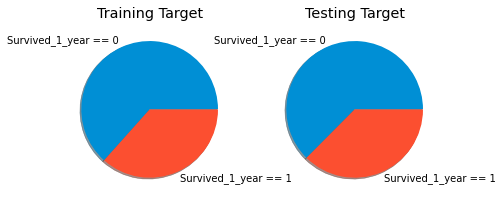

In [33]:
fig,ax=plt.subplots(1,2)
ax[0].pie(y_train.value_counts(),labels = ['Survived_1_year == 0', 'Survived_1_year == 1'],shadow = True)
ax[0].set_title('Training Target')
ax[1].pie(y_test.value_counts(),labels = ['Survived_1_year == 0', 'Survived_1_year == 1'], shadow = True);
ax[1].set_title('Testing Target')

In [34]:
x.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,8,56,18.479385,2.0,0,1,0,1
1,5,36,22.945566,1.0,0,1,1,0
2,23,48,27.510027,1.0,0,1,1,0
3,51,5,19.130976,1.0,1,0,0,1
4,0,128,1.348400,1.0,1,0,1,0


In [ ]:
!pip install eli5
import eli5
from eli5 import show_weights
from eli5.sklearn import PermutationImportance
!pip install pdpbox
import pdpbox
from pdpbox.pdp import *
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
!pip install shape
!pip install shap==0.19.4
import shap
from sklearn import datasets
from sklearn.ensemble import AdaBoostClassifier
import shap
from shap import TreeExplainer
from scipy.special import expit
from shap import force_plot, TreeExplainer, initjs

In [36]:
def correlation (pharma_data, tol = 0.6):
  corr = pharma_data.corr().abs()
  mean_corr = corr.mean()
  up_tri = corr.where(np.triu(np.ones(corr.shape),k = 1).astype(bool))
  drop = []

  for row in range(corr.shape[0] - 1):
    col_ind = row + 1
    for col in range(col_ind,corr.shape[1]):
      if corr.iloc[row,col] > tol:
        drop.append(row) if mean_corr.iloc[row] > mean_corr.iloc[col] else drop.append(col)
        
        return pharma_data.columns[list(set(drop))]


In [37]:
high_corr_feats = correlation(pharma_data)
high_corr_feats

Index(['Patient_Smoker_YES'], dtype='object')

## 6.3 Permutation Importance Results for weight and feature

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x, y, test_size=0.2,random_state = 2) 

def permImp(x, y):
  model = RandomForestClassifier().fit(x,y)
  perm = PermutationImportance(model).fit(x,y)
  return show_weights(perm, feature_names = x.columns.tolist())

def plot_mi(score):
  score = score.sort_values('mi_score', ascending = True)
  plt.barh(score.index, score.mi_score)
  plt.title('mutual info classifier')
  return

def mi_score(x,y):
  score = pd.DataFrame(mutual_info_classif(x,y, discrete_features=False),
                       index = x.columns, columns = ['mi_score']).sort_values('mi_score', ascending = False)
  plot_mi(score) 
  return score            
  

In [39]:
from eli5.sklearn import PermutationImportance
permImp(x_train, y_train)

Weight,Feature
0.2832 ± 0.0034,Patient_Body_Mass_Index
0.2646 ± 0.0034,Diagnosed_Condition
0.2172 ± 0.0025,Patient_Age
0.1385 ± 0.0036,Number_of_prev_cond
0.0788 ± 0.0021,Patient_Smoker_NO
0.0511 ± 0.0011,Patient_Rural_Urban_URBAN
0.0474 ± 0.0016,Patient_Smoker_YES
0.0343 ± 0.0010,Patient_Rural_Urban_RURAL


## **6.4 Mutual Info Classifier Visualization -(mi_score)**

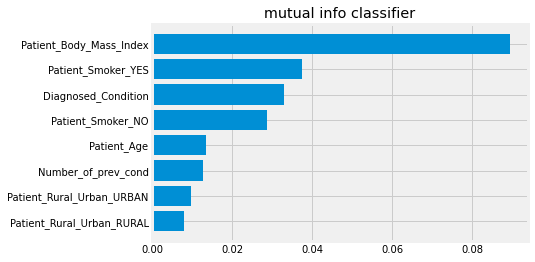

In [40]:
mscore = mi_score(x_train, y_train)

#**7. Build Best Model**

We have seen in our Exploratory Data Analysis that this is a classification problem as the target column 'Survived_1_year treatment has two values 0 - means the patient did not survive after one year of treatment, 1- means the patient survived after one year of treatment. So we can use the classification problem. The classification model is the following: 

Let's test the different algorithms:
*   Logistic Regression
*   ridge
*   SVM(Support Vector Machine)
*   Naive Bayes (Gaussian Naive Bayes)
*   KNN (K-Nearest Neighbors)
*   K-Means (Classification and Regression Tree)
*   Random Forest
*   Decision Tree





In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn_pandas import DataFrameMapper
from sklearn_pandas import CategoricalImputer
!pip install searchgrid==0.1a1
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing as pre
!pip install pipeline-model
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from warnings import filterwarnings as filt


## **7.1 Best Model Results**

Best model results on logistic reg, ridge, SVM, Naive Bayes, KNN, Decision Tree, Random Forest.

In [ ]:
def best_model(x, y, fold = 10):
  models = [LogisticRegression(), RidgeClassifier(), SVC(), GaussianNB(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier()]
  mnames = ['logistic regg','ridge clf','svm','naive bayes','knn','decision tree', 'random forest']
  scalers = [None, StandardScaler(), RobustScaler(),MinMaxScaler()]
  snames = ['none','std','robust','minmax']
  scores = [[] for _ in range(4)]
  total = len(models) * len(scalers)
  print(f'total number of iterations : {total}')

  for model in models:
    for ind, scaler in enumerate(scalers):
      if scaler:
        model = Pipeline(steps = [('scaler', scaler),('model', model)])
        cv = StratifiedKFold(n_splits = fold, shuffle = True)
        score = cross_val_score(model, x, y, cv = cv, scoring = 'f1_micro').mean()
        scores[ind].append(score)
  
  return pd.DataFrame(scores, index = snames, columns = mnames).T




In [ ]:
best_model(x_train, y_train)

total number of iterations : 28


,none,std,robust,minmax
logistic regg,NaN,0.695513,0.694810,0.695622
ridge clf,NaN,0.694377,0.694432,0.694213
svm,NaN,0.733182,0.733670,0.732802
naive bayes,NaN,0.689939,0.690752,0.690480
knn,NaN,0.736591,0.733182,0.732587
decision tree,NaN,0.677816,0.676894,0.680683
random forest,NaN,0.747470,0.748499,0.747524


dropping high correlated feats

In [ ]:
best_model(x_train.drop(high_corr_feats,axis = 1), y_train)

total number of iterations : 28


,none,std,robust,minmax
logistic regg,NaN,0.695460,0.695460,0.695784
ridge clf,NaN,0.694919,0.694594,0.694376
svm,NaN,0.735456,0.734751,0.735455
naive bayes,NaN,0.701954,0.703198,0.702278
knn,NaN,0.733887,0.733561,0.733398
decision tree,NaN,0.680090,0.682362,0.679763
random forest,NaN,0.746280,0.746117,0.745684


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())


1    11675
0     6802
Name: Survived_1_year, dtype: int64
1    2928
0    1692
Name: Survived_1_year, dtype: int64


## **7.2 Overfitting Results**

In [ ]:
from imblearn.over_sampling import SMOTE

smote= SMOTE() # disadvantage - overfitting
new_x_train, new_y_train = smote.fit_resample(x_train, y_train)
new_x_train.shape, x_train.shape

((23350, 8), (18477, 8))

In [ ]:
new_y_train.value_counts()

1    11675
0    11675
Name: Survived_1_year, dtype: int64

Whole dataset + oversampling

In [ ]:
best_model(new_x_train, new_y_train)

total number of iterations : 28


,none,std,robust,minmax
logistic regg,NaN,0.678030,0.677816,0.677730
ridge clf,NaN,0.678244,0.677687,0.678201
svm,NaN,0.752505,0.753148,0.752719
naive bayes,NaN,0.653576,0.653619,0.653790
knn,NaN,0.773747,0.772591,0.771991
decision tree,NaN,0.741585,0.735846,0.742655
random forest,NaN,0.801542,0.801285,0.801071


removing high correlated feats + oversampling

In [ ]:
best_model(new_x_train.drop(high_corr_feats, axis = 1), new_y_train)

total number of iterations : 28


,none,std,robust,minmax
logistic regg,NaN,0.673362,0.673833,0.673533
ridge clf,NaN,0.673233,0.673062,0.673405
svm,NaN,0.747623,0.747709,0.748094
naive bayes,NaN,0.684069,0.684325,0.684540
knn,NaN,0.769507,0.769550,0.767923
decision tree,NaN,0.739358,0.740257,0.740942
random forest,NaN,0.798929,0.799315,0.800557


Random Forest with std scaler for an oversampling dataset gave the highest score of 80% f1 micro score

# **8. Build Models**

## **8.1 Model 1**

In [42]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
pred = model.predict(x_test)

print(f1_score(y_test,pred))

0.7816761146008887


The f1 score by Logistic Regression is 78%.

## **8.2 Model 2**

In [44]:
model2 = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)

model2.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=1)

In [45]:
y_pred = model2.predict(x_test)

fscore = f1_score(y_test, y_pred)
fscore

0.8267229678781481

The f1 score by the Random Forest classifier gave like 82%

# **9. Evaluating on Test Dataset**

## **1.Load the Test Dataset**

In [46]:
# to read test dataset
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [47]:
test_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond
0,19150,40,3709,DX3,16,29.443894,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,23216,52,986,DX6,24,26.836321,NO,URBAN,Stable,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,11890,50,11821,DX4 DX5,63,25.523280,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
3,7149,32,3292,DX6,42,27.171155,NO,URBAN,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0
4,22845,20,9959,DX3,50,25.556192,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
# to view shape
test_data.shape

(9303, 17)

In [49]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  9303 non-null   int64  
 1   Diagnosed_Condition        9303 non-null   int64  
 2   Patient_ID                 9303 non-null   int64  
 3   Treated_with_drugs         9303 non-null   object 
 4   Patient_Age                9303 non-null   int64  
 5   Patient_Body_Mass_Index    9303 non-null   float64
 6   Patient_Smoker             9303 non-null   object 
 7   Patient_Rural_Urban        9303 non-null   object 
 8   Patient_mental_condition   9303 non-null   object 
 9   A                          9303 non-null   float64
 10  B                          9303 non-null   float64
 11  C                          9303 non-null   float64
 12  D                          9303 non-null   float64
 13  E                          9303 non-null   float

There are 9303 observations divided into 17 columns and there are no missing values in the dataset

##**2. Data Cleaning and Preprocessing on test data**

In [50]:
# to drop unnecessary columns from the test dataset
test_data = test_data.drop(['Treated_with_drugs','A','B','C','D','E','F','Z','ID_Patient_Care_Situation','Patient_ID'],axis=1)



In [51]:
test_data.Patient_Smoker[test_data['Patient_Smoker'] == 'Cannot say'] = 'NO'

In [52]:
test_data = test_data.drop(['Patient_mental_condition'], axis = 1)


In [53]:
test_data = pd.get_dummies(test_data, columns=["Patient_Smoker","Patient_Rural_Urban"])
test_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,2.0,1,0,1,0
1,52,24,26.836321,2.0,1,0,0,1
2,50,63,25.523280,2.0,1,0,1,0
3,32,42,27.171155,3.0,1,0,0,1
4,20,50,25.556192,1.0,1,0,1,0


In [54]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Diagnosed_Condition        9303 non-null   int64  
 1   Patient_Age                9303 non-null   int64  
 2   Patient_Body_Mass_Index    9303 non-null   float64
 3   Number_of_prev_cond        9303 non-null   float64
 4   Patient_Smoker_NO          9303 non-null   uint8  
 5   Patient_Smoker_YES         9303 non-null   uint8  
 6   Patient_Rural_Urban_RURAL  9303 non-null   uint8  
 7   Patient_Rural_Urban_URBAN  9303 non-null   uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 327.2 KB


In [55]:
#to check missing values in entire test dataset
test_data.isna().sum().sum()


0

In [56]:
test_data.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,Number_of_prev_cond,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN
0,40,16,29.443894,2.0,1,0,1,0
1,52,24,26.836321,2.0,1,0,0,1
2,50,63,25.523280,2.0,1,0,1,0
3,32,42,27.171155,3.0,1,0,0,1
4,20,50,25.556192,1.0,1,0,1,0


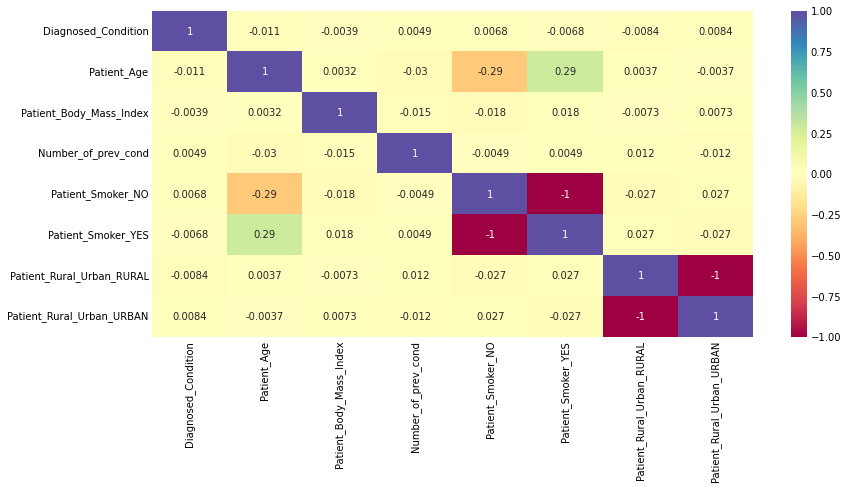

In [57]:
plt.figure(figsize = (12,6))
sns.heatmap(test_data.corr(),annot = True,cmap = 'Spectral')

## **3. Predict on test_data**

In [58]:
y_pred = model2.predict(test_data)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [59]:

y_pred = model2.predict(test_data)


In [60]:
predictions = model2.predict(test_data)

In [61]:
res = pd.DataFrame(predictions)
res.columns = ["prediction"]
res.to_csv("submission.csv", index = False)

In [62]:
from google.colab import files
res.to_csv('submission.csv', index = False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>